In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.colors import ListedColormap
np.random.seed(123)

日本語バージョンはこちらへ：
https://github.com/amar-enkhbat/softmax-regression/blob/master/softmax_regression_jp.ipynb

# Implementing basic Softmax Regression in Python

Let me give you a brief introduction in Softmax Regression, also known as, multinomial logistic regression.

First thing's first. Softmax regression is NOT a regression model. Do not be fooled by its name. Softmax regression is a probabilistic multiclass classifier.

## One-vs-all Logistic regression

The one-vs-all logistic regression for multiclass problems is simple. You simply train $n$ different classifiers for $n$ different classes.

In a pseudocode, the algorithm is as follows: <br>
Inputs: 
  - $L$, a learner
  - Samples $X$
  - Labels $y$ where $y \in \{1,2,3 ..., K \}$ <br>
Output:
  - a list of classifiers $f_k$ for $k \in \{1,2,3 ..., K \}$ <br>
Procedure:
  - For each $k$ in $\{1,2,3...,K\}$
    - Construct a new label vector $z$ where $z_i=1$ if $y_i=k$ and $z_i = 0$ otherwise
    - Apply $L$ to $X$, $z$ to obtain $f_k$ <br>

Making decisions means applying all classifier to an unseen sample $x$ and predicting label $k$ for which the corresponding classifier reports the highest confidence score:
$$\widehat{y}=argmax_{k \in \{1,...,K\}} f_k(x)$$

Easy, right?

However, there's a slight problem. Given a sample $x$ the probabilities classifier 1, classifier 2 and classifier 3 can be 0.9, 0.91 and 0.95 respectively. <br>
Ideally, we would like the the sum of all probabilities to be 1. That's where the __Softmax function__ comes in.

## The softmax function

In Softmax Regression the predicted probability for the $j$-th class given a sample vector $\textbf{x}$ and a weight vector $\textbf{w}$ is:
$$P(y=j | \textbf{x})=\frac{e^{\textbf{x}^T \textbf{w}_j}}{\sum_{k=1}^{K}e^{\textbf{x}^T \textbf{w}_k}}$$

The softmax classifier output _categorical distribution_, that is, a probability distribution over $K$ different possible outcomes. Let's look at an example:

In [2]:
# Sample data

x = np.array([[1, 1], [1, 2], [1, 4], [4, 1], [4, 3], [4, 4]])
y = np.array([0, 0, 1, 1, 2, 2])

Consider we have above 6 samples from 3 different classes.

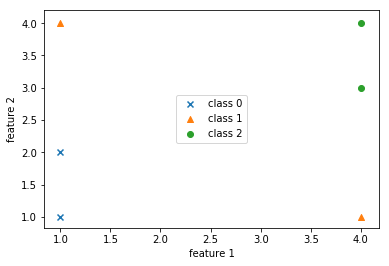

In [3]:
plt.scatter(x[y==0, 0], x[y==0, 1], label = "class 0", marker = "x")
plt.scatter(x[y==1, 0], x[y==1, 1], label = "class 1", marker = "^")
plt.scatter(x[y==2, 0], x[y==2, 1], label = "class 2", marker = "o")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend(loc = "center")
plt.show()

And weights:

In [4]:
w = np.array([[0.1, 0.1, 0.2], [0.3, 0.2, 0.2], [0.1, 0.1, 0.3]])
print("Weights: ")
print(w)

Weights: 
[[0.1 0.1 0.2]
 [0.3 0.2 0.2]
 [0.1 0.1 0.3]]


First, let's compute the net input $z=\textbf{x}^T \textbf{w}$:

In [5]:
def net_input(X, weight):
    return X.dot(weight[1:]) + weight[0]
z = net_input(x, w)
print("Net input:")
print(z)

Net input:
[[0.5 0.4 0.7]
 [0.6 0.5 1. ]
 [0.8 0.7 1.6]
 [1.4 1.  1.3]
 [1.6 1.2 1.9]
 [1.7 1.3 2.2]]


Then, let's compute the exponential of $z$:

In [6]:
z_exp = np.exp(z)
print("Exponential of z:")
print(z_exp)

Exponential of z:
[[1.64872127 1.4918247  2.01375271]
 [1.8221188  1.64872127 2.71828183]
 [2.22554093 2.01375271 4.95303242]
 [4.05519997 2.71828183 3.66929667]
 [4.95303242 3.32011692 6.68589444]
 [5.47394739 3.66929667 9.0250135 ]]


Finally, we compute the $\sum_{k=1}^{K}e^{\textbf{x}^T \textbf{w}_k}$ and divide $e^z$ by it:

In [7]:
z_normal = z_exp.sum(axis = 1)
output = z_exp / z_normal.reshape(-1, 1)

Then we finally get the Softmax output of net input $z=\textbf{x}^T \textbf{w}$:

In [8]:
print("Output:")
print(output)

Output:
[[0.31987306 0.28943311 0.39069383]
 [0.29440668 0.26639018 0.43920315]
 [0.24210857 0.21906889 0.53882253]
 [0.38832577 0.26030255 0.35137169]
 [0.33110622 0.22194714 0.44694665]
 [0.30129182 0.20196195 0.49674623]]


In [9]:
print("The sum of probabilities in the horizontal axis:")
print(output.sum(axis = 1))

The sum of probabilities in the horizontal axis:
[1. 1. 1. 1. 1. 1.]


As we can see above, the Softmax function gives us a nice categorical distribution where the sum of probabilities of each sample is equal to 1. <br>

### Why softmax function?

The output of Softmax, for example: the probability of sample x belonging to class 0 is 50%, class 2: 40% and class 3 10%, is easy for humans to interpret. You'll see softmax function being used in many image recognition neural networks where they need to output categorical probabilities such as: dog: 50%, cat: 40% and truck: 10% etc.

Numerically stable softmax function in Python: 

In [10]:
def softmax(z):
    log_c = np.max(z, axis = 1) * (-1)
    log_c = log_c.reshape(-1, 1)
    prob = np.exp(z + log_c)
    prob = prob / np.exp(z + log_c).sum(axis = 1).reshape(-1, 1)
    return np.clip(prob, 1e-15, 1-1e-15)

## Softmax Regression intuition

The schematic for Softmax Regression is as follows:

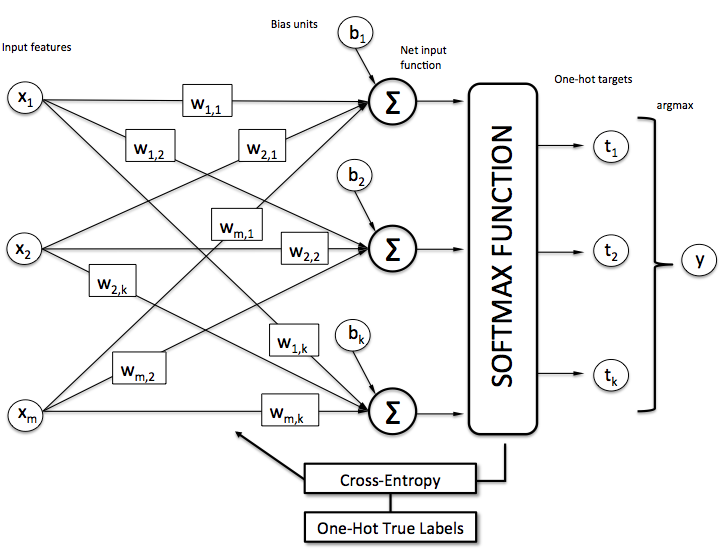

In [11]:
Image(filename='images/softmax_schematic_1.png')

  - First, we compute $K$ different net inputs:
$$z_1 = x_1 w_{1,1} + x_2 w_{2,1} + x_3 w_{31} + b_1$$
$$z_2 = x_1 w_{1,2} + x_2 w_{2,2} + x_3 w_{32} + b_2$$
$$                    ...                           $$
$$z_m = x_1 w_{1,m} + x_2 w_{2,m} + x_3 w_{3m} + b_m$$
or simple vectorized form:
$$\textbf{z}=\textbf{x}^T\textbf{w}$$
  - Then we compute the categorical probability distribution using the Softmax function
  $$P(\textbf{z})_j=\frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}$$
  - Lastly, by minimizing the cross-entropy function through gradient-descent algorithm to we get the learned weights.

## The loss function

### The cross entropy function

The cross-entropy function is given as follows:
$$H(p, q)=-\sum_i p_i log(q_i)$$
where, $p$ is the true distribution and $q$ is the predicted distribution. <br>
The cross-entropy function measures the performance of a classification model whose output is a probability value between 0 to 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. <br>
Let's look at an example: <br>

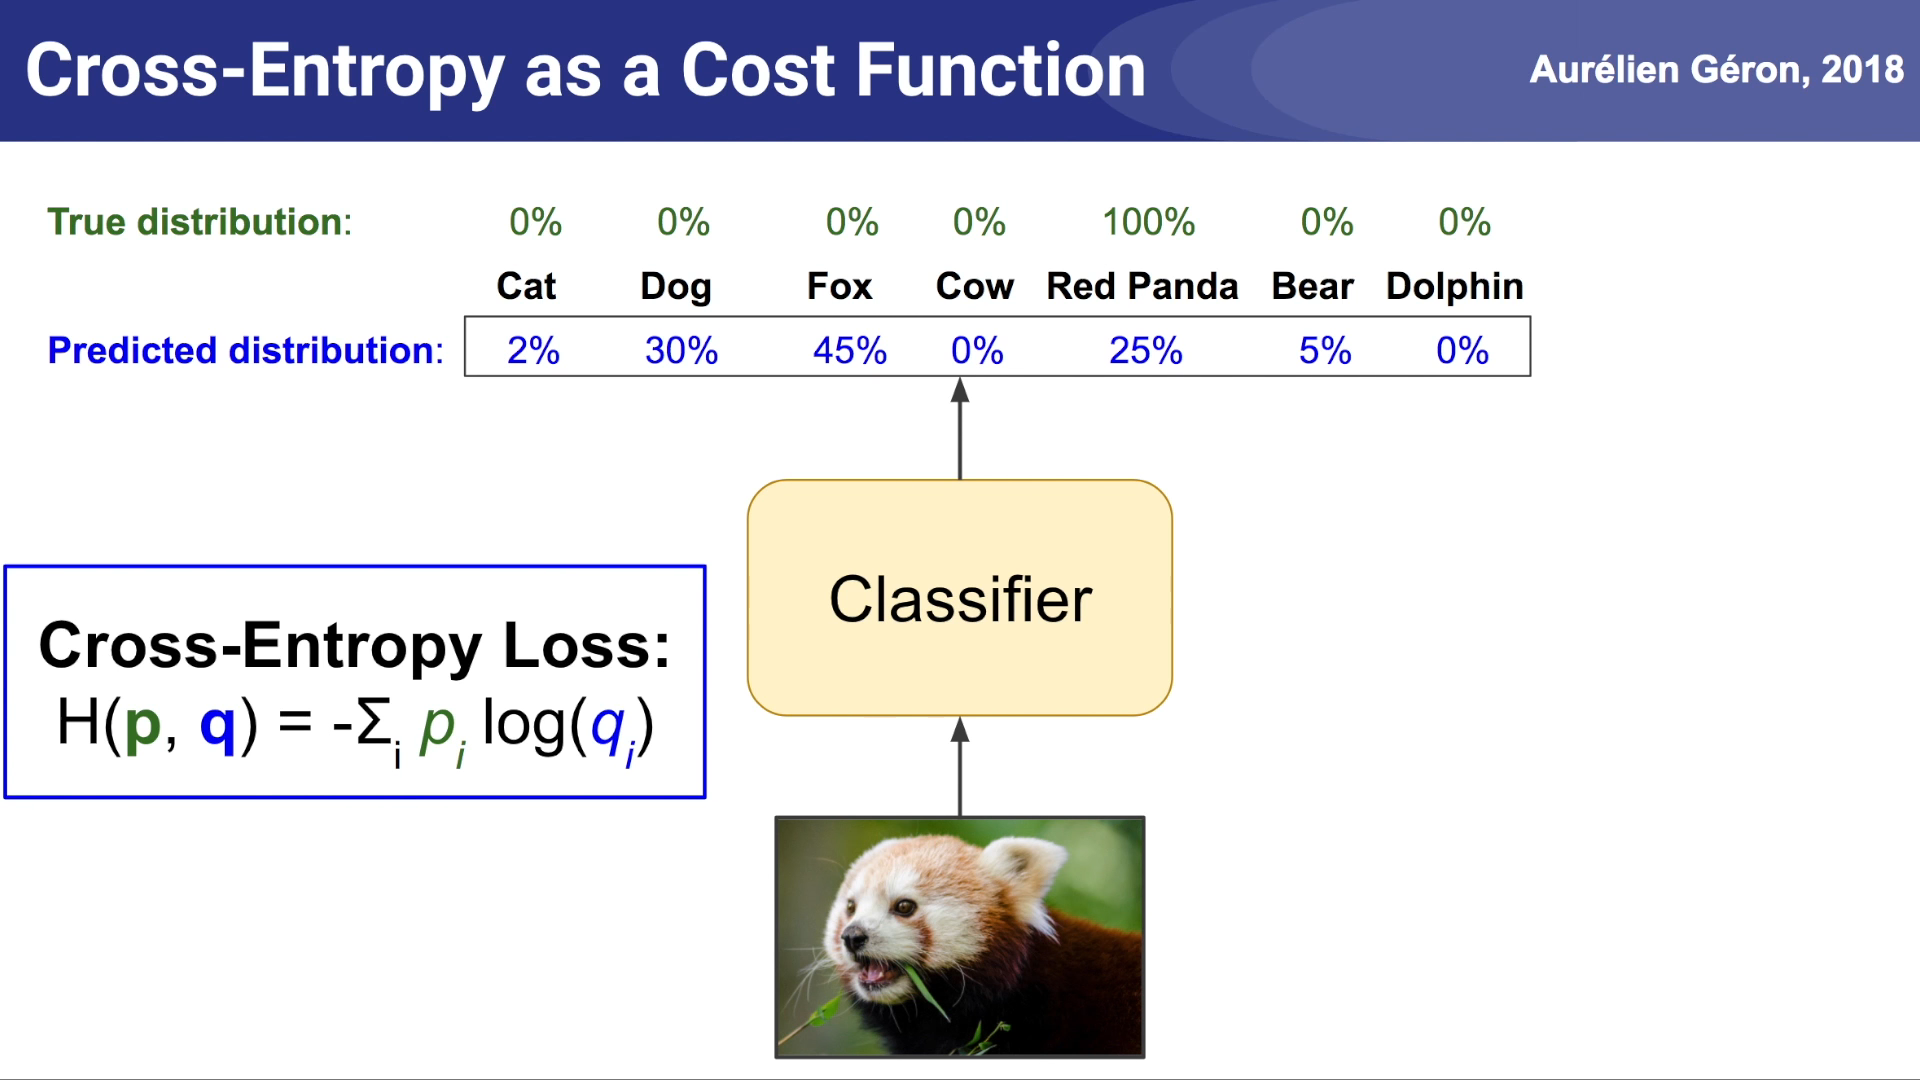

In [12]:
Image(filename='images/cross_entropy.png')

The true distribution $p$ is, 
$$p=\{0, 0, 0, 0, 1, 0, 0\}$$
predicted distribution $q$ is,
$$q=\{0.02, 0.3, 0.45, 0, 0.25, 0.5, 0\}$$
So the cross-entropy loss of $p$ and $q$ is
$$H(p,q)=-log(0.25)=1.3863$$

#### One-hot encoding

One hot encoding is required to get the true distribution $p$ from labels. Simply, we create an array where categories are converted into binary vectors like shown below.

In [13]:
class_labels = int(y.max() + 1)
def one_hot_encoder(y):
    a = np.zeros((len(y), class_labels))
    for idx, i in enumerate(y):
        a[idx, int(i)] = 1
    return a
print("one-hot encoded y:")
print(one_hot_encoder(y))

one-hot encoded y:
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


#### Cross entropy function plot

Let's plot the cross-entropy function when the true probability is 1.

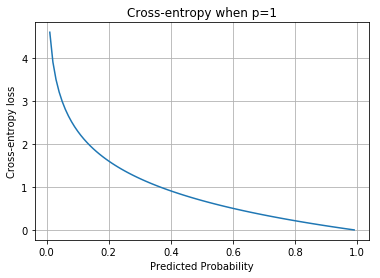

In [14]:
a = np.arange(0.01, 1, 0.01)
plt.title("Cross-entropy when p=1")
plt.plot(a, -np.log(a))
plt.xlabel("Predicted Probability")
plt.ylabel("Cross-entropy loss")
plt.grid()
plt.show()

As we can see from the graph above, the cross-entropy loss increases as our predicted probability decreases. Also, since it's a _convex_ function we can use it for gradient descent algorithm.

### The loss function

The cost $J(\textbf{w})$ of softmax regression is the mean of all cross-entropy losses on sample $\textbf{x}$
$$J(\textbf{w})=\frac{1}{m}\sum_{i=1}^m H(y_i, P(\textbf{x}^T_i;\textbf{w})))$$
where, $m$ is the number of samples and $K$ is the number of labels.

Now let's compute how much error we had with the previous weights $w$:

In [15]:
def compute_cost(X, y, weight):
    y_pred_enc = one_hot_encoder(y)
    z = net_input(X, weight)
    activation = softmax(z)
    cross_entropy = - np.sum(np.log(activation) * (y_pred_enc), axis = 1)
    return np.mean(cross_entropy)
print("Cost：")
print(compute_cost(x, y, w))

Cost：
1.1219826681518716


## Training the weights

The gradient descent algorithm is,
$$\textbf{w}=\textbf{w}-\eta \Delta J(\textbf{w})$$
where, $\eta$ is the learning rate. <br>
The derivative of $J(\textbf{w})$ is
$$\Delta_{w^{(k)}} J(\textbf{w})=-\sum_{i=1}^m[x^{(i)}(1\{y^{(i)}=k\}-P(y^{(i)}=k|x^{(i)};\textbf{w}))]$$


As a naive python implementation:

In [16]:
# Number of epochs or iterations
epochs = 1000

# Learning rate (eta)
learning_rate = 0.05

# Training function
def train(X, y, epochs, learning_rate):
    
    # Random weight initialization
    weight = np.random.normal(loc = 0, scale = 0.01, size = (X.shape[1] + 1, len(np.unique(y))))
    
    # Empty array to save the costs in each epoch
    cost_array = []
    
    # one-hot encoded true labels
    y_encoded = one_hot_encoder(y)
    
    #Training
    for epoch in range(epochs):
        # net input
        z = net_input(X, weight) 
        # softmax function activation
        activation = softmax(z)
        
        # diff = -(1{y^i=k} - P(y^i=k|x^i;w))
        diff = activation - y_encoded 
        
        # grad = sum(-x^i * (1{y^i=k} - P(y^i=k|x^i;w)))
        grad = np.dot(X.T, diff)

        # w = w - n * grad(J(w))
        weight[1:] -= learning_rate * grad
        weight[0] -= learning_rate * np.sum(diff, axis = 0)
        
        # Cost compute
        cost = compute_cost(X, y, weight)
        
        # Saving the cost
        cost_array.append(cost)
    return weight, cost_array

Now, let's train the weights on the samples $x$ and labels $y$ we defined above.

In [17]:
learned_w, cost_array = train(x, y, epochs, learning_rate)

After training, we can verify how much the weights $w$ have changed.

In [18]:
print("Learned weights:")
print(learned_w)

Learned weights:
[[ 8.54408544  0.66169269 -9.2038312 ]
 [-2.10079965  0.20086784  1.89559722]
 [-1.83378529  0.12681407  1.69107466]]


Using the trained weights, we can visualize the decision regions of each labels.

In [19]:
# Full prediction function
def full_predict(X, weight):
    z = net_input(X, weight)
    activation = softmax(z)
    y_predicted = activation.argmax(axis = 1)
    return y_predicted

# Plot decision regions function. For more details go to: 
# https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
def plot_decision_regions(X, y, weight, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = full_predict(np.array([xx1.ravel(), xx2.ravel()]).T, weight)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')

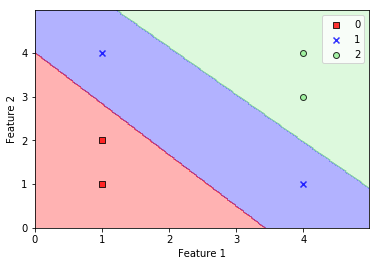

In [20]:
plot_decision_regions(x, y, learned_w)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

We now have trained proper softmax regression and verified the results. As we did with the Logistic Regression, we will now plot the cost-epoch graph to verify our code has no errors or miscalculations.

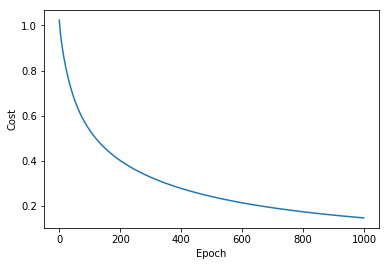

In [21]:
plt.plot(range(len(cost_array)), cost_array)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

It seems, our learning rate may have been a bit small. The training took many epochs before converging. I'll leave the tuning to you. You'll likely to discover a few important problems in machine learning.

Sources and References：
  - Sebastian Raschka. _Python Machine Learning (Bonus)_ 2016. Retrieved from:
  https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/softmax-regression.ipynb
  - Andrew Ng, _Machine Learning by Stanford University_. Retrieved from:
  https://www.coursera.org/learn/machine-learning/
  - Andrew Ng et al. _ULFDL Tutorial, Softmax Regression_. Retrieved from:
  http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/
  - Aurélien Géron. _Entropy, Cross-Entropy & KL-Divergence_ Feb 2018. Retrieved from:
  https://www.youtube.com/watch?v=ErfnhcEV1O8
